In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from glob import glob
import cv2

In [48]:
directory='C:/Users/Aditya/Documents/GitHub/Covid-19-Diagnosis-from-Lung-CT-Scans/Dataset'
path_covid_positive_cases=os.path.join('C:/Users/Aditya/Documents/GitHub/Covid-19-Diagnosis-from-Lung-CT-Scans/Dataset/CT_COVID/')
path_covid_negative_cases=os.path.join('C:/Users/Aditya/Documents/GitHub/Covid-19-Diagnosis-from-Lung-CT-Scans/Dataset/CT_NonCOVID/')

In [49]:
positive_covid_images = glob(os.path.join(path_covid_positive_cases,"*.png"))
positive_covid_images.extend(glob(os.path.join(path_covid_positive_cases,"*.jpg")))
negative_covid_images = glob(os.path.join(path_covid_negative_cases,"*.png"))
negative_covid_images.extend(glob(os.path.join(path_covid_negative_cases,"*.jpg")))

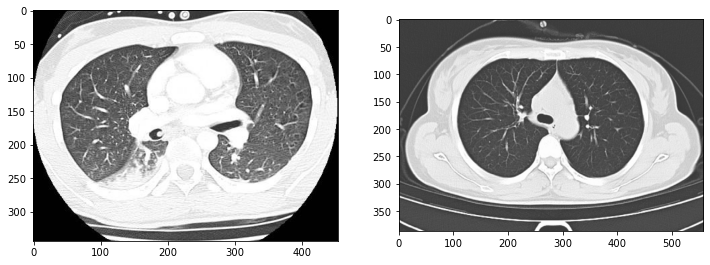

In [57]:
image_positive=cv2.imread(os.path.join(positive_images_ls[110]))
image_negative=cv2.imread(os.path.join(negative_images_ls[110]))

f = plt.figure(figsize=(12,12))
f.add_subplot(1, 2, 1)
plt.imshow(image_negative)
f.add_subplot(1,2, 2)
plt.imshow(image_positive)
for a in ax:
    a.axis('off')
fig.tight_layout()

In [50]:
covid = {'class': 'CT_COVID','path': path_covid_positive_cases,'images': positive_covid_images}
non_covid = {'class': 'CT_NonCOVID','path': path_covid_negative_cases,'images': negative_covid_images}

In [16]:
desc_df = pd.DataFrame(columns=['Height of CT Scans', 'Width of CT Scans'])
img_list = []

for img_name in os.listdir(path_covid_positive_cases):
    img = cv2.imread(os.path.join(path_covid_positive_cases, img_name))
    img_list.append(img.shape[:-1])

for img_name in os.listdir(path_covid_negative_cases):
    img = cv2.imread(os.path.join(path_covid_negative_cases, img_name))
    img_list.append(img.shape[:-1])

desc_df['Height of CT Scans'] = list(zip(*img_list))[0]
desc_df['Width of CT Scans'] = list(zip(*img_list))[1]

In [19]:
desc_df.describe()

,Height of CT Scans,Width of CT Scans
count,746.000000,746.000000
mean,302.553619,425.482574
std,145.210573,188.546038
min,61.000000,115.000000
25%,204.000000,311.250000
50%,291.000000,407.000000
75%,363.750000,512.000000
max,1225.000000,1671.000000


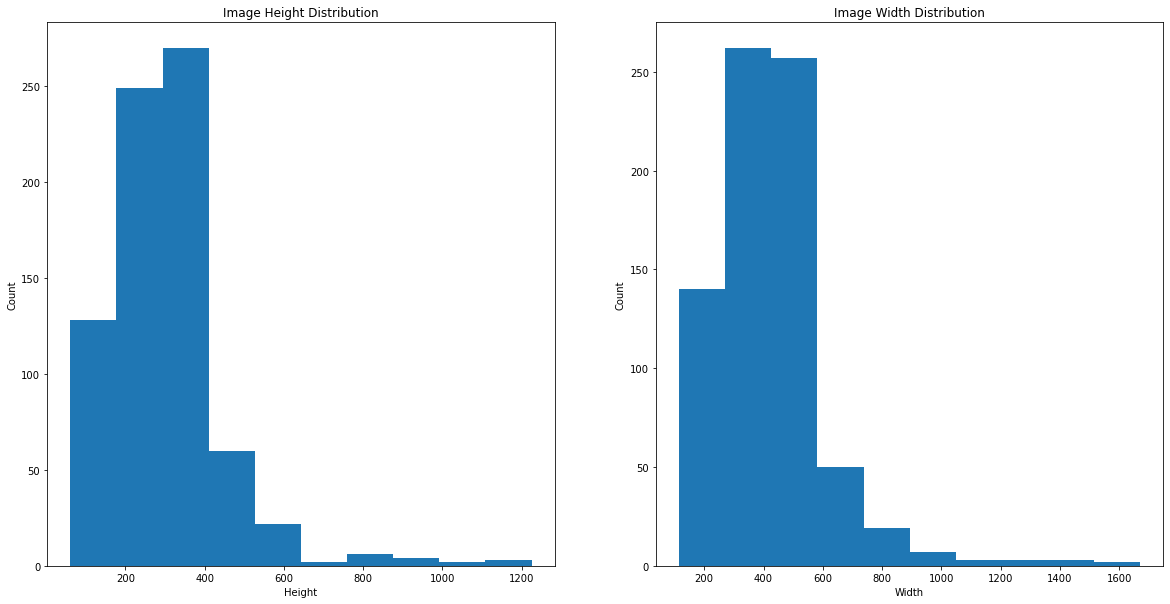

In [21]:
fig=plt.figure(1,figsize=(20, 10))
plt.subplot(121)
plt.hist(desc_df['Height of CT Scans'])
plt.title('Image Height Distribution')
plt.xlabel('Height')
plt.ylabel('Count')
plt.subplot(122)
plt.hist(desc_df['Width of CT Scans'])
plt.title('Image Width Distribution')
plt.xlabel('Width')
plt.ylabel('Count')
plt.show()

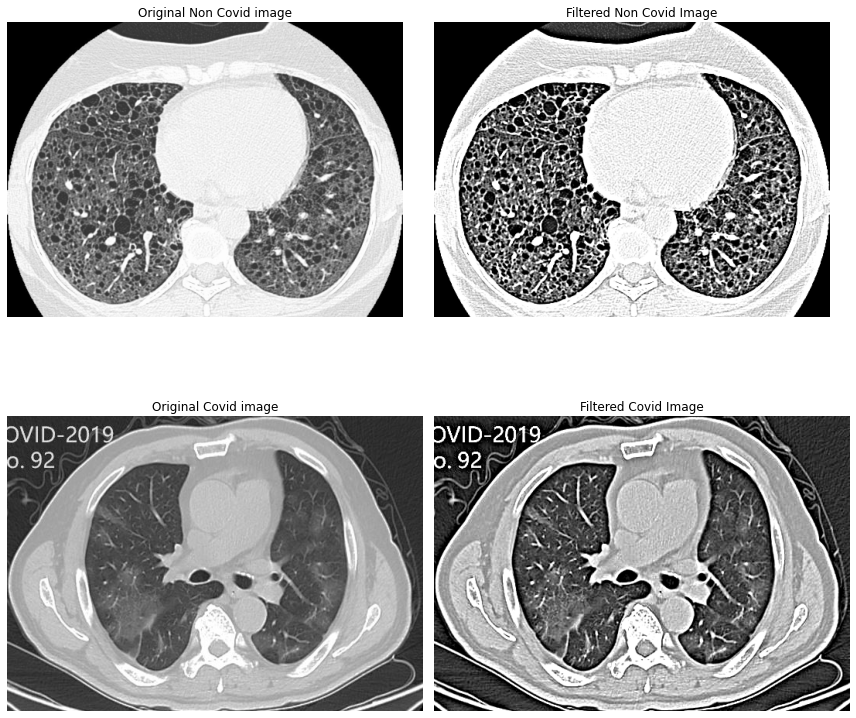

In [56]:
from skimage.filters import unsharp_mask

cvd_img = cv2.imread(os.path.join(positive_covid_images[31]))
ncvd_img = cv2.imread(os.path.join(negative_covid_images[30]))

cvd_img_filter=unsharp_mask(cvd_img, radius=5, amount=2)
ncvd_img_filter=unsharp_mask(ncvd_img, radius=5, amount=2)
fig, axes = plt.subplots(nrows=2, ncols=2,sharex=True, sharey=True, figsize=(12, 12))
ax = axes.ravel()
ax[0].imshow(ncvd_img, cmap=plt.cm.gray)
ax[0].set_title('Original Non Covid image')
ax[1].imshow(ncvd_img_filter, cmap=plt.cm.gray)
ax[1].set_title("Filtered Non Covid Image")
ax[2].imshow(cvd_img, cmap=plt.cm.gray)
ax[2].set_title('Original Covid image')
ax[3].imshow(cvd_img_filter, cmap=plt.cm.gray)
ax[3].set_title("Filtered Covid Image")
for a in ax:
    a.axis('off')
fig.tight_layout()
plt.show()